# 연령별취업자수관계

- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기

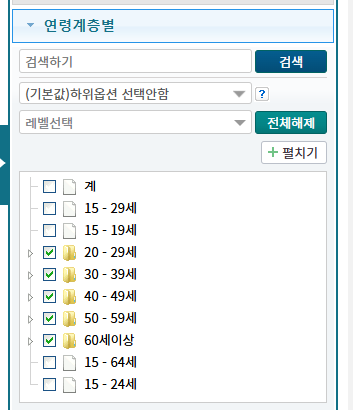
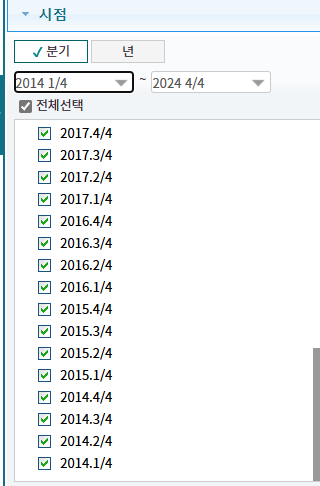
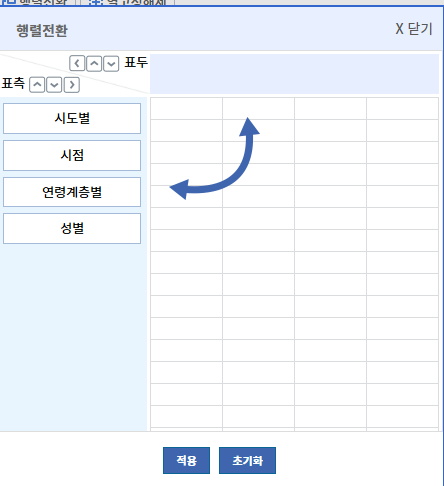

In [7]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

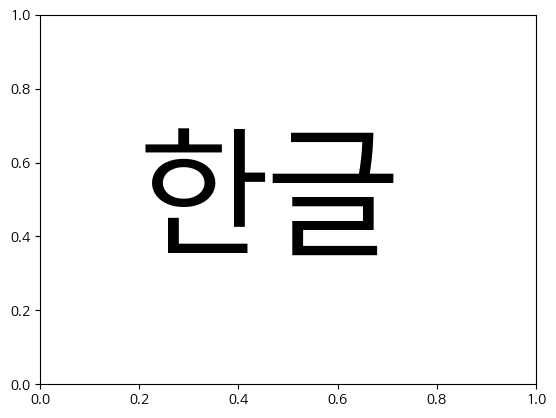

In [5]:
# 윈도우용 폰트 경로 설정
path = 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf'
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [9]:
file_path = "./ref/행정구역시도성연령별취업자20250304.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [27]:
ex_data = ori.copy() #복사
ex_data.columns = ['resion','year','age','gender','value'] #컬럼이름 일괄 교체
ex_data.loc[ex_data['resion']=='세종특별자치시','value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) #세종특별자치시

In [28]:
ex_data['value'] = ex_data['value'].astype(int) 
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")

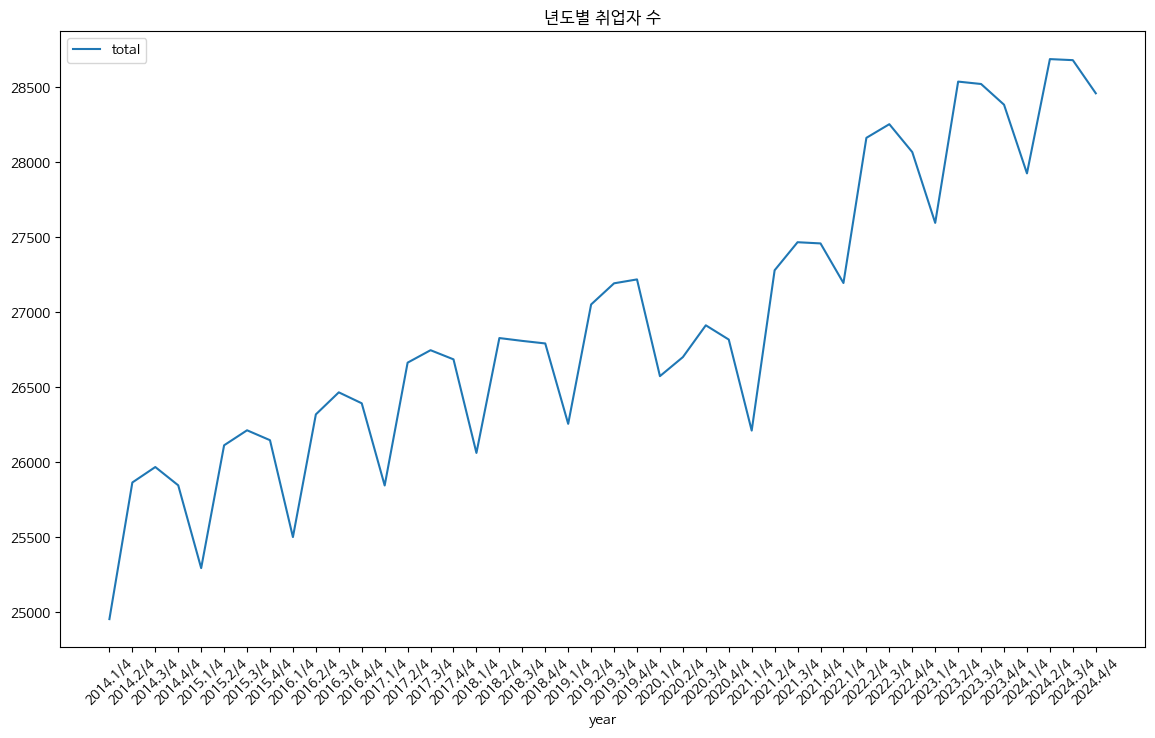

In [29]:
ax = ex1_data.plot(x='year',y='total',figsize=(14,8),title='년도별 취업자 수')
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [38]:
ex2_data = ori.copy() # 복사
ex2_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex2_data.loc[ex2_data['resion']=='세종특별자치시','value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) #세종특별자치시
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [39]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [41]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

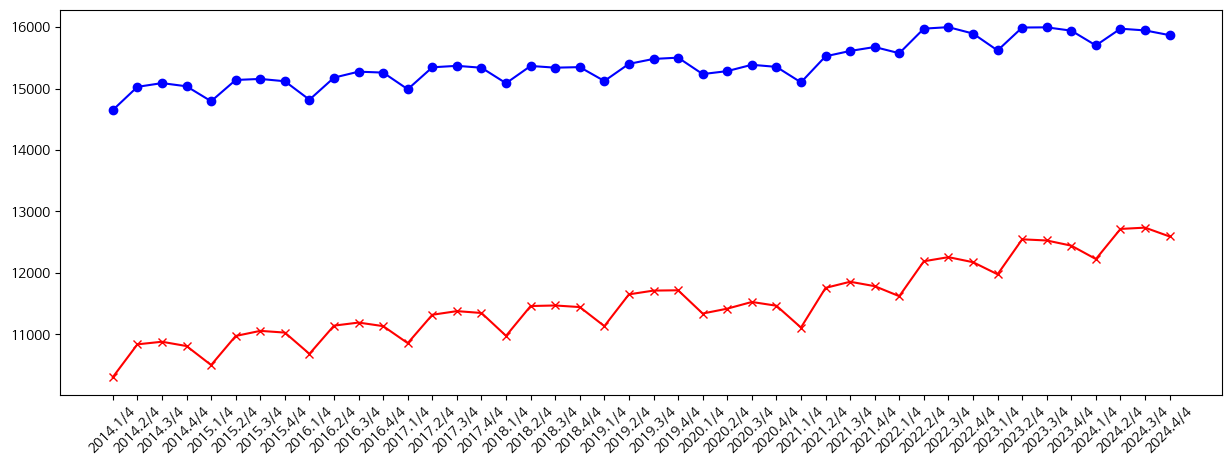

In [50]:
plt.figure(figsize=(15,5))
plt.plot(male['year'],male['total'],label='남자',color='blue',linestyle='-',marker='o')
plt.plot(female['year'],female['total'],label='여자',color='red',linestyle='-',marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

In [51]:
ex3_data = ori.copy() # 복사
ex3_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex3_data.loc[ex3_data['resion']=='세종특별자치시','value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) #세종특별자치시
ex3_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [70]:
ex3_data['value'] = ex3_data['value'].astype(int)
res = ex3_data.groupby(['resion'])['value'].sum().reset_index(name='total')
res = pd.DataFrame(res)
res

,resion,total
0,강원도,34616
1,경기도,303811
2,경상남도,75520
3,경상북도,63011
4,광주광역시,32635
5,대구광역시,53606
6,대전광역시,33927
7,부산광역시,73294
8,서울특별시,224277
9,세종특별자치시,5684


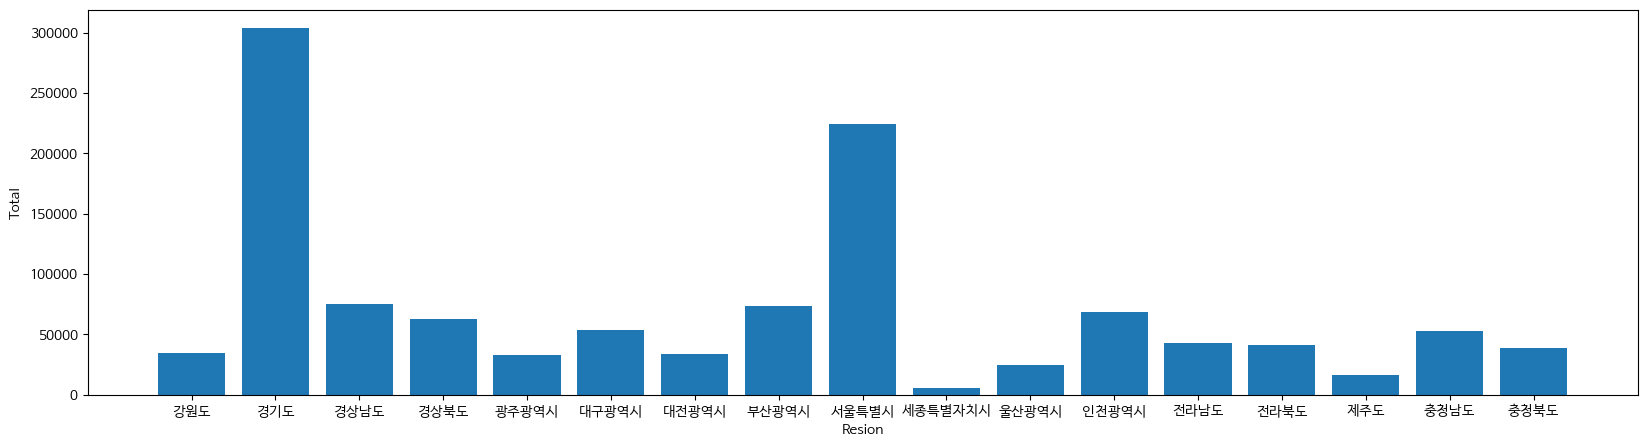

In [76]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(res['resion'],res['total'])
ax.set_xlabel('Resion')
ax.set_ylabel('Total')
plt.show()

- 경기도에서의 취업률이 가장 높음
- 서울과 경기도가 압도적인 취업률을 가지고있고 나머지는 고만고만함